In [1]:
import csv
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from matplotlib.pyplot import subplots
%matplotlib inline

In [2]:
import gpxpy
gpx = gpxpy.parse(open('../Project-Data/boston-marathon-course.gpx'))

In [3]:
track_coords = [[point.latitude,point.longitude, point.elevation] 
                                for track in gpx.tracks 
                                    for segment in track.segments 
                                        for point in segment.points]

In [4]:
coords = pd.DataFrame(track_coords, columns=['Latitude','Longitude','Altitude'])

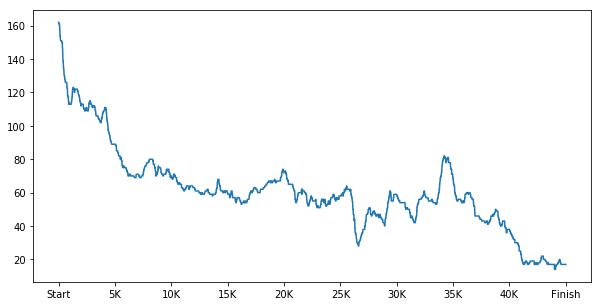

In [5]:
fig,ax=subplots(figsize=(10,5))
ax.plot(coords.index,coords['Altitude'])
ax.set_xticks(np.linspace(0,3886,num=10))
ax.set_xticklabels(['Start','5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K','Finish'])
fig.savefig("elevation.png",dpi=500)


This part of the code was to chart how the pace changes through the course,
but since it was also done by another team member was not reflected in presentation


In [6]:
data2015 = pd.read_csv('marathon_results_2015.csv')
data2016 = pd.read_csv('marathon_results_2016.csv')
data2017= pd.read_csv("marathon_results_2017.csv")

In [7]:
segments2015 = data2015[['5K', '10K', '15K', '20K',  '25K', '30K', '35K', '40K']]
segments2016 = data2016[['5K', '10K', '15K', '20K',  '25K','30K', '35K', '40K']]
segments2017 = data2017[['5K', '10K', '15K', '20K', '25K','30K', '35K', '40K']]

In [8]:
mask = np.column_stack([segments2015[col].str.contains("-", na=False) for col in segments2015])
segments2015= segments2015.loc[~mask.any(axis=1)]
mask = np.column_stack([segments2016[col].str.contains("-", na=False) for col in segments2016])
segments2016= segments2016.loc[~mask.any(axis=1)]
mask = np.column_stack([segments2017[col].str.contains("-", na=False) for col in segments2017])
segments2017= segments2017.loc[~mask.any(axis=1)]

In [9]:
segments2015=segments2015.apply(pd.to_timedelta)
segments2016=segments2016.apply(pd.to_timedelta)
segments2017=segments2017.apply(pd.to_timedelta)

In [10]:
for col in segments2015:
    segments2015[col]=segments2015[col].dt.total_seconds()
for col in segments2016:
    segments2016[col]=segments2016[col].dt.total_seconds()
for col in segments2017:
    segments2017[col]=segments2017[col].dt.total_seconds()
    

In [11]:
pace2015=pd.DataFrame()
prev='5K'
for col in segments2015:
    if col=='5K':
        pace2015[col]= segments2015[col] 
    else:
        pace2015[col]=segments2015[col]-segments2015[prev]
    prev=col

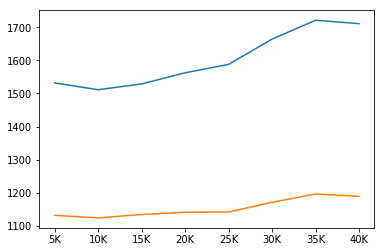

In [12]:
fig, ax = subplots()
x=['5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K']
ax.plot(x,pace2015.mean(),x,pace2015[:1000].mean() )
fig.savefig('mean-pace.png')
